In [28]:
import pandas as pd
import numpy as np
import scipy.stats as st

df = pd.read_csv("../datasets/blocks.csv", index_col = 0)

df.head()

,Child,Number,Time,Trial,Shape,Age
0,A,11,30.0,1,Cube,4.67
1,B,9,19.0,1,Cube,5.00
2,C,8,18.6,1,Cube,4.42
3,D,9,23.0,1,Cube,4.33
4,E,10,29.0,1,Cube,4.33


### a) Hacer gráfico

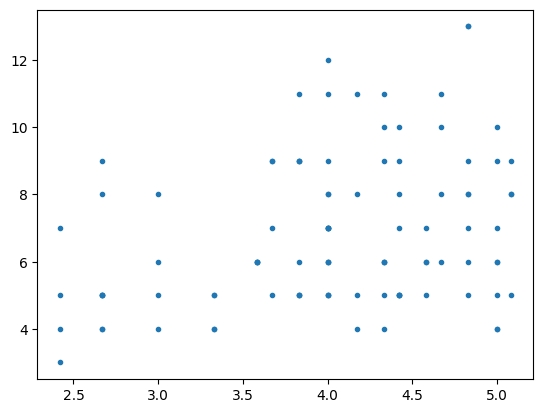

In [29]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(df["Age"], df["Number"], ".")

Vamos a usar Poisson, porque es una cuenta (contamos bloques)

### b) Ajustar el MLG (Poisson)

In [20]:
# y = Poisson(mu)
# log(mu) = beta0 + beta1 * x
# mu = exp(betas x X)
# y -> bloques
# x -> edad

Vamos a usar MLE para estimar los betas

In [21]:
# maximizar L -> maximizar l -> maximizar:

#sum[- exp(b_0  + b_1 * x_i)]

In [30]:
intercept = np.ones_like(df["Age"])
X_intercept = np.column_stack([intercept, df["Age"]])
Y = df["Number"]

In [32]:

from scipy.optimize import minimize

def neg_log_likelihood(beta, X, Y):
    mu = np.exp(np.dot(X, beta))
    return - np.sum(Y*np.log(mu) - mu)

initial_beta = [0,0]
result_poisson = minimize(neg_log_likelihood, initial_beta, args = (X_intercept, Y))

In [33]:
beta_0, beta_1 = result_poisson.x

In [34]:
beta_0, beta_1

(1.3446993160649712, 0.1415096089907883)

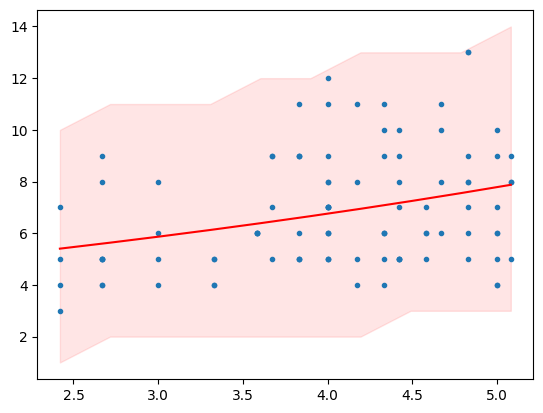

In [37]:
plt.plot(df["Age"], Y, ".")

age_linspace = np.linspace(df["Age"].min(), df["Age"].max(), 10)
X_ = np.column_stack((np.ones(len(age_linspace)), age_linspace))
lower_bound, upper_bound = st.poisson.interval(0.95, np.exp(np.dot(X_, result_poisson.x)))
plt.plot(age_linspace, np.exp(np.dot(X_, result_poisson.x)), color = "red")
plt.fill_between(age_linspace, lower_bound, upper_bound, color="red", alpha=0.1)
plt.show()

### c) Estimar el error estandar de los betas

Tenemos que encontrar la matriz de informacion de Fisher

In [10]:
phi = 1 #por ser Poisson, entonces ni lo pongo en la ecuacion

mu = np.exp(X_intercept @ result_poisson.x) # no son los estimados, son los observados
W = np.diag(mu)

Fisher_info_matrix = X_intercept.T @ W @ X_intercept

In [11]:
cov_matrix = np.linalg.inv(Fisher_info_matrix)
cov_matrix

array([[ 0.04944116, -0.01169638],
       [-0.01169638,  0.0028516 ]])

In [16]:
sem = np.sqrt(cov_matrix[1][1])

In [17]:
sem

0.0534004032535844

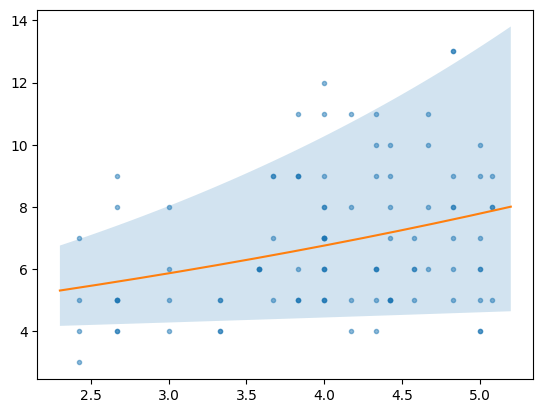

In [14]:
fig, ax = plt.subplots()
x = df["Age"]
ax.plot(x, Y, ".", alpha = 0.5)

X_estimacion = np.linspace(2.3, 5.2, 1000) # rango de edades

mu_pred = np.exp(beta_0 + beta_1 * X_estimacion)

mu_alto = np.exp(beta_0 + (beta_1 + sem * 1.96) * X_estimacion) #de donde sale el 1.96?
mu_bajo = np.exp(beta_0 + (beta_1 - sem * 1.96) * X_estimacion)
ax.plot(X_estimacion, mu_pred)
ax.fill_between(X_estimacion, mu_bajo, mu_alto, alpha = 0.2)

In [14]:
beta_1

0.1415096089907883

In [15]:
sem

0.0534004032535844

### d) no lo vamos a hacer, es un tema que no vimos